In [1]:
import json
from collections import Counter
from tqdm import tqdm
import numpy as np

In [2]:
# Path to the JSONL file
file_path = "data/user_histories.jsonl"

item_counter = dict()
category_counter = Counter()

item_counter = dict()
with open(file_path, 'r') as f:
    for line in f:
        data = json.loads(line)
        products = data["products"]
        categories = data["categories"]


        for i in range(len(products)):
            if not products[i] in item_counter:
                item_counter[products[i]] = {"count": 0, "category": categories[i]}
            item_counter[products[i]]["count"] += 1

        category_counter.update(categories)

item_counter = dict(item_counter)
category_counter = dict(category_counter)

In [3]:
print(len(item_counter))
print(len(category_counter))

126611
1244


In [4]:
purchases_per_category = [pair[1] for pair in category_counter.items()]
percentile = np.percentile(purchases_per_category, 98)
filtered_category_counter = {pair[0]: pair[1] for pair in category_counter.items() if pair[1] > percentile}
filtered_categories = set(filtered_category_counter.keys())

filtered_categories

{2053013553056579841,
 2053013553199186187,
 2053013553341792533,
 2053013553559896355,
 2053013554415534427,
 2053013554658804075,
 2053013554725912943,
 2053013555631882655,
 2053013558920217191,
 2053013563810775923,
 2053013563835941749,
 2232732079706079299,
 2232732081585127530,
 2232732082063278200,
 2232732089269092627,
 2232732091718566220,
 2232732092297380188,
 2232732093077520756,
 2232732098228126185,
 2232732098446229999,
 2232732099754852875,
 2232732101063475749,
 2232732101407408685,
 2232732103101907535,
 2232732103831716449}

In [5]:
category_filter_fp = "data/user_histories_filtered.jsonl"
filtered_item_counter = Counter()

seq_lens = list()

item_counter = dict()
with open(file_path, 'r') as inp_f:
    with open(category_filter_fp, 'w') as out_f:
        for line in inp_f:
            data = json.loads(line)
            out_data = {"times": list(), "products": list(), "sessions": list(), "categories": list(), "user_id": data["user_id"]}

            for i in range(len(data["times"])):
                curr_category = data["categories"][i]
                if curr_category in filtered_categories:
                    out_data["times"].append(data["times"][i])
                    out_data["products"].append(data["products"][i])
                    out_data["sessions"].append(data["sessions"][i])
                    out_data["categories"].append(data["categories"][i])

            if len(out_data["times"]) >= 5:
                out_f.write(json.dumps(out_data) + '\n')

                filtered_item_counter.update(out_data["products"])
                seq_lens.append(len(out_data["times"]))

In [6]:
print(len(filtered_item_counter))

24185


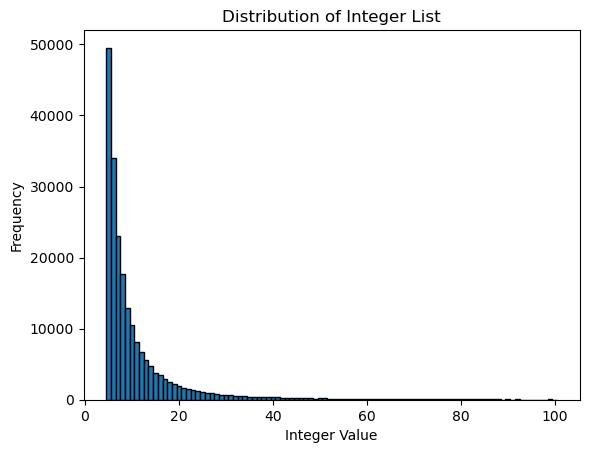

In [9]:
import matplotlib.pyplot as plt

filtered_seq_lens = [i for i in seq_lens if i <= 100]

# Plot the histogram
plt.hist(filtered_seq_lens, bins=range(min(filtered_seq_lens), max(filtered_seq_lens) + 2), edgecolor='black', align='left')
plt.xlabel('Integer Value')
plt.ylabel('Frequency')
plt.title('Distribution of Integer List')
plt.show()